In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Unzip the file**

In [3]:
import zipfile

# Specify the name of the uploaded zip file
zip_file_name = '/content/drive/MyDrive/Audio Data.zip'

# Specify the directory where you want to extract the contents
extract_dir = '/content/Audio_data'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Optionally, you can print a message to confirm that the extraction was successful
print("Extraction complete.")

Extraction complete.


In [4]:
# Specify the name of the uploaded zip file
zip_file_name = '/content/drive/MyDrive/Crema.zip'

# Specify the directory where you want to extract the contents
extract_dir = '/content/Crema'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Optionally, you can print a message to confirm that the extraction was successful
print("Extraction complete.")

Extraction complete.


In [5]:
# Specify the name of the uploaded zip file
zip_file_name = '/content/drive/MyDrive/TESS.zip'

# Specify the directory where you want to extract the contents
extract_dir = '/content/Tess'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Optionally, you can print a message to confirm that the extraction was successful
print("Extraction complete.")

Extraction complete.


In [6]:
# Specify the name of the uploaded zip file
zip_file_name = '/content/drive/MyDrive/Savee.zip'

# Specify the directory where you want to extract the contents
extract_dir = '/content/Savee'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Optionally, you can print a message to confirm that the extraction was successful
print("Extraction complete.")

Extraction complete.


## **Libraries**

In [7]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import multiprocessing as mp
import timeit
from tqdm import tqdm

# Audio processing
import librosa
import librosa.display
from IPython.display import Audio as ipdAudio

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D

# Utility
import os
import zipfile

#TensorFlow
import tensorflow as tf
import tensorflow.keras.layers as L

In [8]:
!apt-get update
!apt-get install -y libsndfile1

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [805 kB]
Hit:4 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:9 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,124 kB]
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 http://archive.ubuntu.com/

## **Data**

In [9]:
#preparing data set

ravdess = "/content/Audio_data/audio_speech_actors_01-24"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_08', 'Actor_03', 'Actor_05', 'Actor_23', 'Actor_06', 'Actor_24', 'Actor_16', 'Actor_01', 'Actor_14', 'Actor_07', 'Actor_17', 'Actor_21', 'Actor_09', 'Actor_12', 'Actor_19', 'Actor_04', 'Actor_18', 'Actor_11', 'Actor_02', 'Actor_15', 'Actor_20', 'Actor_10', 'Actor_22', 'Actor_13']


In [10]:
Crema = "/content/Crema/AudioWAV/"
Tess = "/content/Tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/content/Savee/ALL/"

## **Data Preprocessing**

**Ravdess Data Preprocessing**

In [11]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess +'/'+ i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + '/' +i + '/' + f)


In [12]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-04-01-02-02-13.wav
03
/content/Audio_data/audio_speech_actors_01-24/Actor_08/03-01-06-01-01-02-08.wav
5
03-01-05-02-01-02-13.wav


In [13]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())



  Emotions                                               Path
0     fear  /content/Audio_data/audio_speech_actors_01-24/...
1     fear  /content/Audio_data/audio_speech_actors_01-24/...
2    angry  /content/Audio_data/audio_speech_actors_01-24/...
3  neutral  /content/Audio_data/audio_speech_actors_01-24/...
4     fear  /content/Audio_data/audio_speech_actors_01-24/...
______________________________________________
      Emotions                                               Path
1435     happy  /content/Audio_data/audio_speech_actors_01-24/...
1436  surprise  /content/Audio_data/audio_speech_actors_01-24/...
1437     happy  /content/Audio_data/audio_speech_actors_01-24/...
1438     angry  /content/Audio_data/audio_speech_actors_01-24/...
1439     angry  /content/Audio_data/audio_speech_actors_01-24/...
_______________________________________________
Emotions
neutral     288
fear        192
angry       192
sad         192
disgust     192
surprise    192
happy       192
Name: count, dty

**Crema Data Preprocessing**

In [14]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

Emotions
disgust    1271
fear       1271
angry      1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64


**Tess Data Preprocessing**

In [15]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())

Emotions
fear        400
angry       400
happy       400
disgust     400
surprise    400
neutral     400
sad         400
Name: count, dtype: int64


**Savee Data Preprocessing**

In [16]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())

Emotions
neutral     120
angry        60
fear         60
sad          60
disgust      60
happy        60
surprise     60
Name: count, dtype: int64


**Integration of datasets**

In [17]:
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,fear,/content/Audio_data/audio_speech_actors_01-24/...
1,fear,/content/Audio_data/audio_speech_actors_01-24/...
2,angry,/content/Audio_data/audio_speech_actors_01-24/...
3,neutral,/content/Audio_data/audio_speech_actors_01-24/...
4,fear,/content/Audio_data/audio_speech_actors_01-24/...


In [18]:
print(data_path.Emotions.value_counts())


Emotions
fear        1923
angry       1923
sad         1923
disgust     1923
happy       1923
neutral     1895
surprise     652
Name: count, dtype: int64


## **Data Visualization**

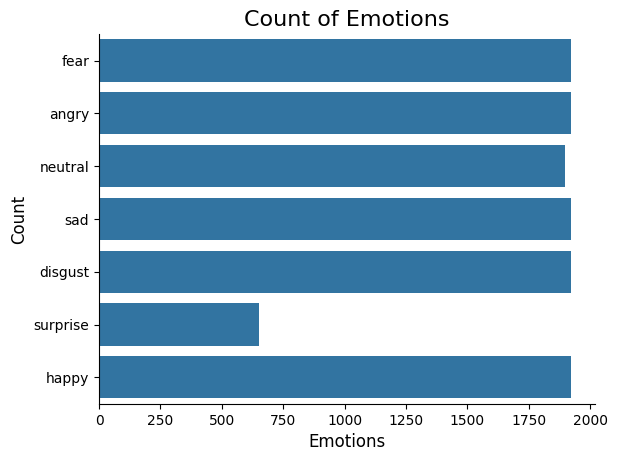

In [19]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [20]:
data,sr = librosa.load(file_path[0])
sr

22050

In [21]:
ipdAudio(data,rate=sr)

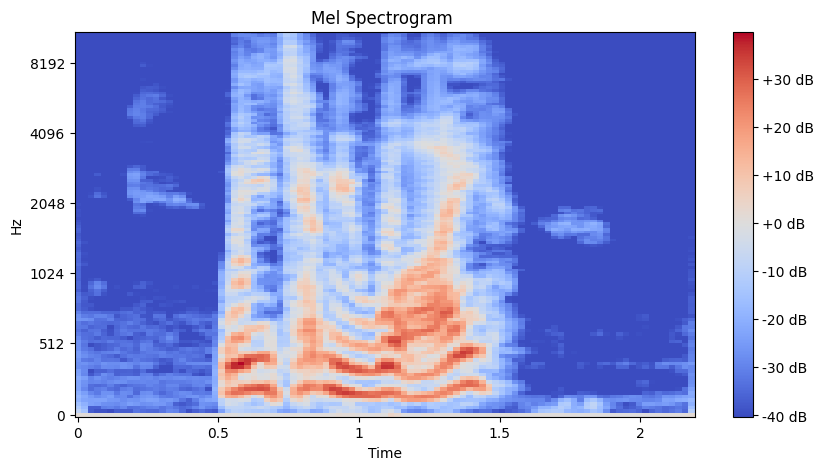

In [22]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

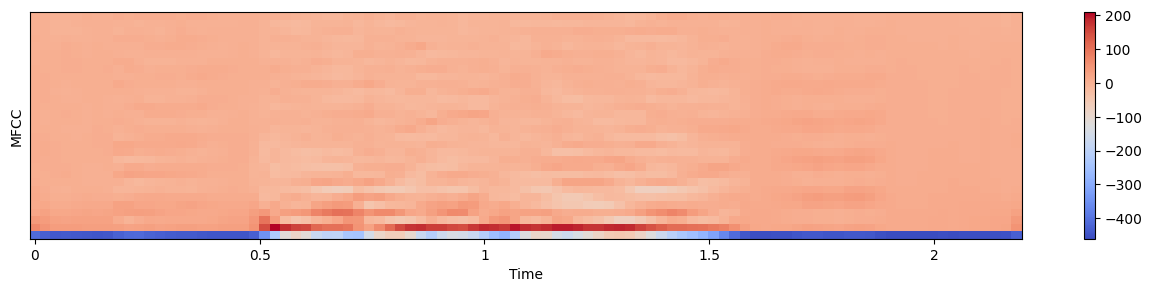

In [23]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipdAudio(data,rate=sr)

## **Data Augmentation**

In [24]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

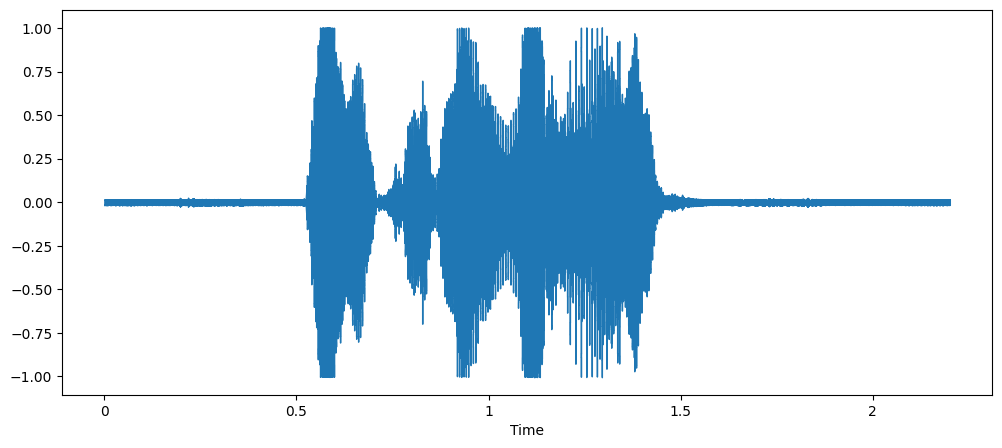

In [25]:
# NORMAL AUDIO

plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipdAudio(data,rate=sr)

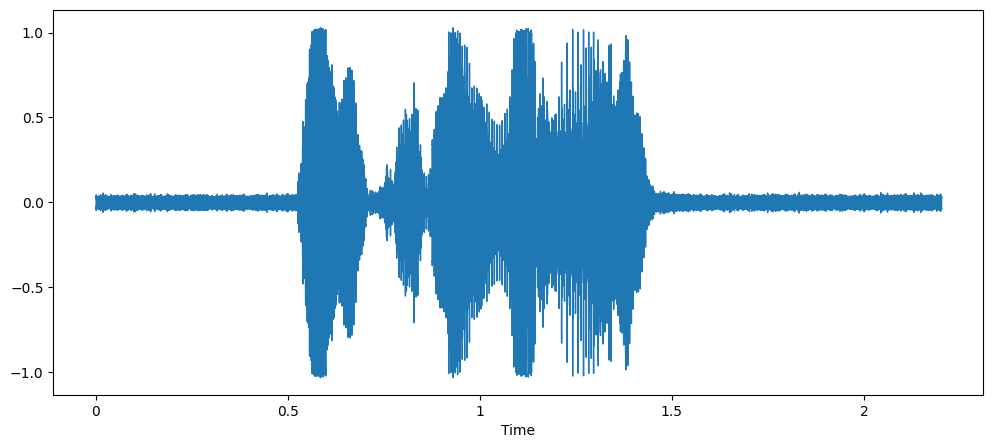

In [26]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipdAudio(x, rate=sr)

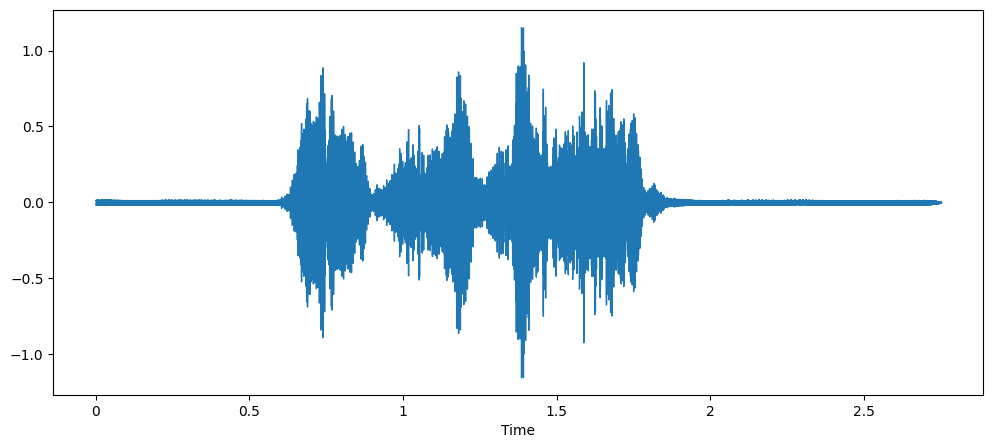

In [27]:
# STRETCHED AUDIO
stretch_factor = 0.8
stretched_data = librosa.effects.time_stretch(data, rate=stretch_factor)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(stretched_data, sr=sr)
ipdAudio(stretched_data, rate=sr)

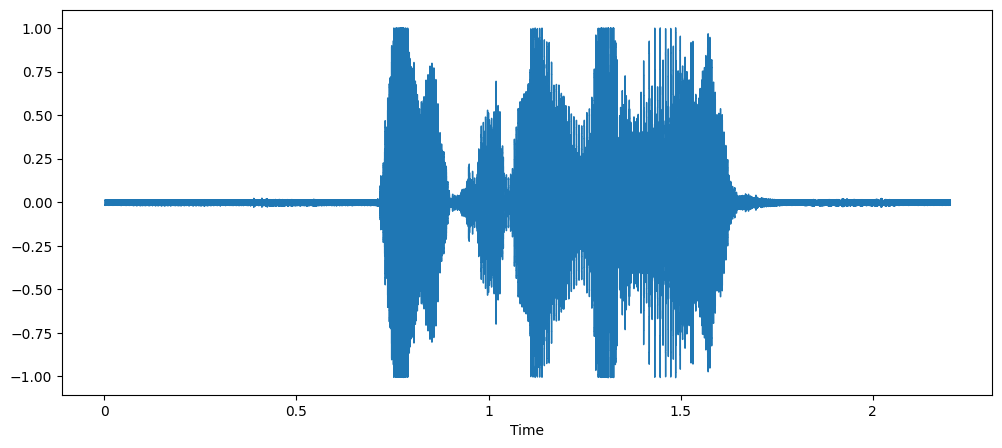

In [28]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipdAudio(x, rate=sr)

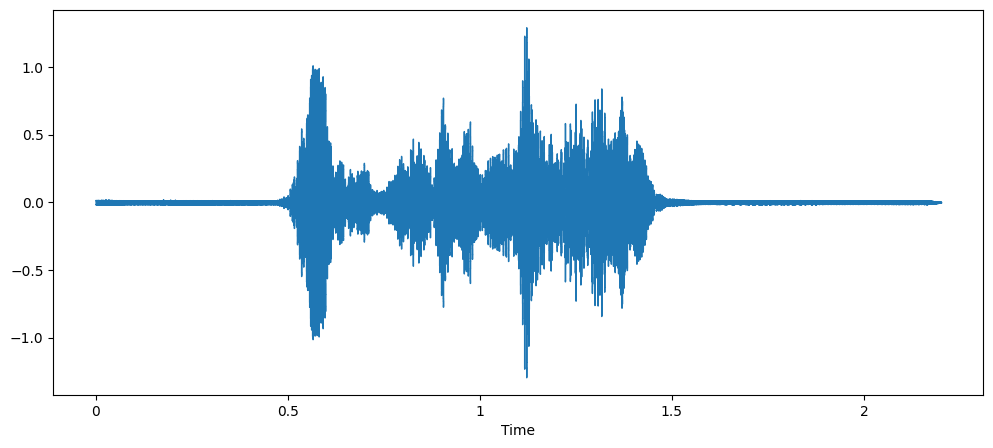

In [29]:
# AUDIO WITH PITCH
pitch_factor = 2
pitch_shifted_data = librosa.effects.pitch_shift(data, sr=sr, n_steps=pitch_factor)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(pitch_shifted_data, sr=sr)
ipdAudio(pitch_shifted_data, rate=sr)

## **Feature Extraction**

In [30]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data, frame_length=2048, hop_length=512):
    rms = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rms)
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten:bool=True):
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=20, hop_length=hop_length, n_fft=frame_length)
    return np.squeeze(mfccs.T) if not flatten else np.ravel(mfccs.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)

    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))

    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))

    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))

    return audio

In [31]:
print("Number of processors: ", mp.cpu_count())

Number of processors:  2


## **Getting features**

In [33]:
from joblib import Parallel, delayed
import timeit
start = timeit.default_timer()
# Define a function to get features for a single audio file
def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    return X, Y

paths = data_path.Path
emotions = data_path.Emotions

# Run the loop in parallel
results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))

# Collect the results
X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)


stop = timeit.default_timer()

print('Time: ', stop - start)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Time:  1070.1827260149998


In [34]:
len(X), len(Y), data_path.Path.shape


(48648, 48648, (12162,))

## **Saving features**

In [35]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.080566,0.133301,0.192383,0.243164,0.263184,0.288574,0.304199,0.304688,0.297363,0.292480,...,-4.710086,12.967789,4.688076,9.396318,8.467379,-4.608564,7.508706,14.699736,12.429237,fear
1,0.229492,0.343262,0.457520,0.455078,0.443848,0.438965,0.430176,0.430176,0.422363,0.417480,...,3.025087,8.890291,9.152021,11.352258,3.363928,2.397622,7.295314,10.206857,10.771500,fear
2,0.078125,0.132812,0.186035,0.228027,0.254883,0.279297,0.303711,0.305176,0.301758,0.295898,...,1.535635,11.674459,9.276748,10.101815,4.175395,-0.033425,8.095098,11.614202,3.034330,fear
3,0.248535,0.370117,0.498535,0.497070,0.499512,0.501953,0.496582,0.485840,0.471191,0.471191,...,1.138352,5.611484,9.075014,6.349242,7.999065,4.088030,5.822659,8.066440,7.720914,fear
4,0.110352,0.184570,0.212891,0.265137,0.233398,0.238770,0.297363,0.331543,0.337402,0.340820,...,-0.167858,0.898563,2.573256,2.783475,1.931881,2.098027,3.450656,3.926924,2.685382,fear


In [36]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.080566,0.133301,0.192383,0.243164,0.263184,0.288574,0.304199,0.304688,0.297363,0.292480,...,-4.710086,12.967789,4.688076,9.396318,8.467379,-4.608564,7.508706,14.699736,12.429237,fear
1,0.229492,0.343262,0.457520,0.455078,0.443848,0.438965,0.430176,0.430176,0.422363,0.417480,...,3.025087,8.890291,9.152021,11.352258,3.363928,2.397622,7.295314,10.206857,10.771500,fear
2,0.078125,0.132812,0.186035,0.228027,0.254883,0.279297,0.303711,0.305176,0.301758,0.295898,...,1.535635,11.674459,9.276748,10.101815,4.175395,-0.033425,8.095098,11.614202,3.034330,fear
3,0.248535,0.370117,0.498535,0.497070,0.499512,0.501953,0.496582,0.485840,0.471191,0.471191,...,1.138352,5.611484,9.075014,6.349242,7.999065,4.088030,5.822659,8.066440,7.720914,fear
4,0.110352,0.184570,0.212891,0.265137,0.233398,0.238770,0.297363,0.331543,0.337402,0.340820,...,-0.167858,0.898563,2.573256,2.783475,1.931881,2.098027,3.450656,3.926924,2.685382,fear


In [37]:
print(Emotions.isna().any())


0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [38]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(48648, 2377)

In [39]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

## **Data Preparation**

In [40]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [41]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()


In [42]:
print(Y.shape)
X.shape

(48648, 7)


(48648, 2376)

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376), (38918, 7), (9730, 2376), (9730, 7))

In [44]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [45]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376), (38918, 7), (9730, 2376), (9730, 7))

In [46]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, LSTM, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

**Applying early stop for the Model**

In [47]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [48]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

## **CNN model training**

In [49]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((38918, 2376, 1), (38918, 7), (9730, 2376, 1), (9730, 7))

In [50]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2376, 512)         3072      
                                                                 
 batch_normalization (Batch  (None, 2376, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 1188, 512)         0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1188, 512)         1311232   
                                                                 
 batch_normalization_1 (Bat  (None, 1188, 512)         2048      
 chNormalization)                                                
                                                        

In [51]:
history=model.fit(x_traincnn, y_train, epochs=20, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/20
609/609 [==============================] - ETA: 0s - loss: 1.3970 - accuracy: 0.4674

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


609/609 [==============================] - 213s 324ms/step - loss: 1.3970 - accuracy: 0.4674 - val_loss: 1.3701 - val_accuracy: 0.4673 - lr: 0.0010
Epoch 2/20
608/609 [============================>.] - ETA: 0s - loss: 1.1075 - accuracy: 0.5704

609/609 [==============================] - 206s 338ms/step - loss: 1.1075 - accuracy: 0.5704 - val_loss: 1.3872 - val_accuracy: 0.4827 - lr: 0.0010
Epoch 3/20
608/609 [============================>.] - ETA: 0s - loss: 0.9932 - accuracy: 0.6168

609/609 [==============================] - 206s 338ms/step - loss: 0.9932 - accuracy: 0.6167 - val_loss: 0.9783 - val_accuracy: 0.6170 - lr: 0.0010
Epoch 4/20
608/609 [============================>.] - ETA: 0s - loss: 0.8753 - accuracy: 0.6656

609/609 [==============================] - 206s 338ms/step - loss: 0.8754 - accuracy: 0.6656 - val_loss: 0.8711 - val_accuracy: 0.6630 - lr: 0.0010
Epoch 5/20
608/609 [============================>.] - ETA: 0s - loss: 0.7420 - accuracy: 0.7188

609/609 [==============================] - 198s 325ms/step - loss: 0.7420 - accuracy: 0.7187 - val_loss: 0.7924 - val_accuracy: 0.6982 - lr: 0.0010
Epoch 6/20
608/609 [============================>.] - ETA: 0s - loss: 0.6149 - accuracy: 0.7732

609/609 [==============================] - 206s 338ms/step - loss: 0.6150 - accuracy: 0.7731 - val_loss: 0.7696 - val_accuracy: 0.7179 - lr: 0.0010
Epoch 7/20
608/609 [============================>.] - ETA: 0s - loss: 0.5647 - accuracy: 0.7918

609/609 [==============================] - 206s 338ms/step - loss: 0.5647 - accuracy: 0.7918 - val_loss: 0.5492 - val_accuracy: 0.7996 - lr: 0.0010
Epoch 8/20
608/609 [============================>.] - ETA: 0s - loss: 0.3726 - accuracy: 0.8657

609/609 [==============================] - 205s 337ms/step - loss: 0.3727 - accuracy: 0.8657 - val_loss: 0.6637 - val_accuracy: 0.7615 - lr: 0.0010
Epoch 9/20
608/609 [============================>.] - ETA: 0s - loss: 0.2906 - accuracy: 0.8968

609/609 [==============================] - 198s 324ms/step - loss: 0.2906 - accuracy: 0.8968 - val_loss: 0.4250 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 10/20
608/609 [============================>.] - ETA: 0s - loss: 0.1968 - accuracy: 0.9321

609/609 [==============================] - 205s 337ms/step - loss: 0.1969 - accuracy: 0.9321 - val_loss: 0.4992 - val_accuracy: 0.8218 - lr: 0.0010
Epoch 11/20
608/609 [============================>.] - ETA: 0s - loss: 0.2827 - accuracy: 0.9010

609/609 [==============================] - 206s 338ms/step - loss: 0.2828 - accuracy: 0.9010 - val_loss: 0.3038 - val_accuracy: 0.8930 - lr: 0.0010
Epoch 12/20
608/609 [============================>.] - ETA: 0s - loss: 0.1237 - accuracy: 0.9582

609/609 [==============================] - 197s 324ms/step - loss: 0.1238 - accuracy: 0.9582 - val_loss: 0.2327 - val_accuracy: 0.9207 - lr: 0.0010
Epoch 13/20
608/609 [============================>.] - ETA: 0s - loss: 0.1000 - accuracy: 0.9672

609/609 [==============================] - 205s 337ms/step - loss: 0.1001 - accuracy: 0.9672 - val_loss: 0.2550 - val_accuracy: 0.9150 - lr: 0.0010
Epoch 14/20
608/609 [============================>.] - ETA: 0s - loss: 0.1289 - accuracy: 0.9567

609/609 [==============================] - 206s 338ms/step - loss: 0.1289 - accuracy: 0.9567 - val_loss: 0.2288 - val_accuracy: 0.9229 - lr: 0.0010
Epoch 15/20
608/609 [============================>.] - ETA: 0s - loss: 0.0967 - accuracy: 0.9677

609/609 [==============================] - 197s 324ms/step - loss: 0.0970 - accuracy: 0.9677 - val_loss: 0.3775 - val_accuracy: 0.8757 - lr: 0.0010
Epoch 16/20
608/609 [============================>.] - ETA: 0s - loss: 0.1768 - accuracy: 0.9413

609/609 [==============================] - 205s 337ms/step - loss: 0.1770 - accuracy: 0.9412 - val_loss: 0.1680 - val_accuracy: 0.9462 - lr: 0.0010
Epoch 17/20
608/609 [============================>.] - ETA: 0s - loss: 0.0693 - accuracy: 0.9768

609/609 [==============================] - 206s 338ms/step - loss: 0.0694 - accuracy: 0.9768 - val_loss: 0.1608 - val_accuracy: 0.9482 - lr: 0.0010
Epoch 18/20
608/609 [============================>.] - ETA: 0s - loss: 0.0587 - accuracy: 0.9808

609/609 [==============================] - 206s 337ms/step - loss: 0.0589 - accuracy: 0.9807 - val_loss: 0.2358 - val_accuracy: 0.9191 - lr: 0.0010
Epoch 19/20
608/609 [============================>.] - ETA: 0s - loss: 0.0966 - accuracy: 0.9673

609/609 [==============================] - 197s 324ms/step - loss: 0.0967 - accuracy: 0.9673 - val_loss: 0.1800 - val_accuracy: 0.9422 - lr: 0.0010
Epoch 20/20
608/609 [============================>.] - ETA: 0s - loss: 0.0596 - accuracy: 0.9806

609/609 [==============================] - 205s 337ms/step - loss: 0.0596 - accuracy: 0.9806 - val_loss: 0.1652 - val_accuracy: 0.9516 - lr: 0.0010


305/305 [==============================] - 16s 47ms/step - loss: 0.1652 - accuracy: 0.9516
Accuracy of our model on test data :  95.15929818153381 %


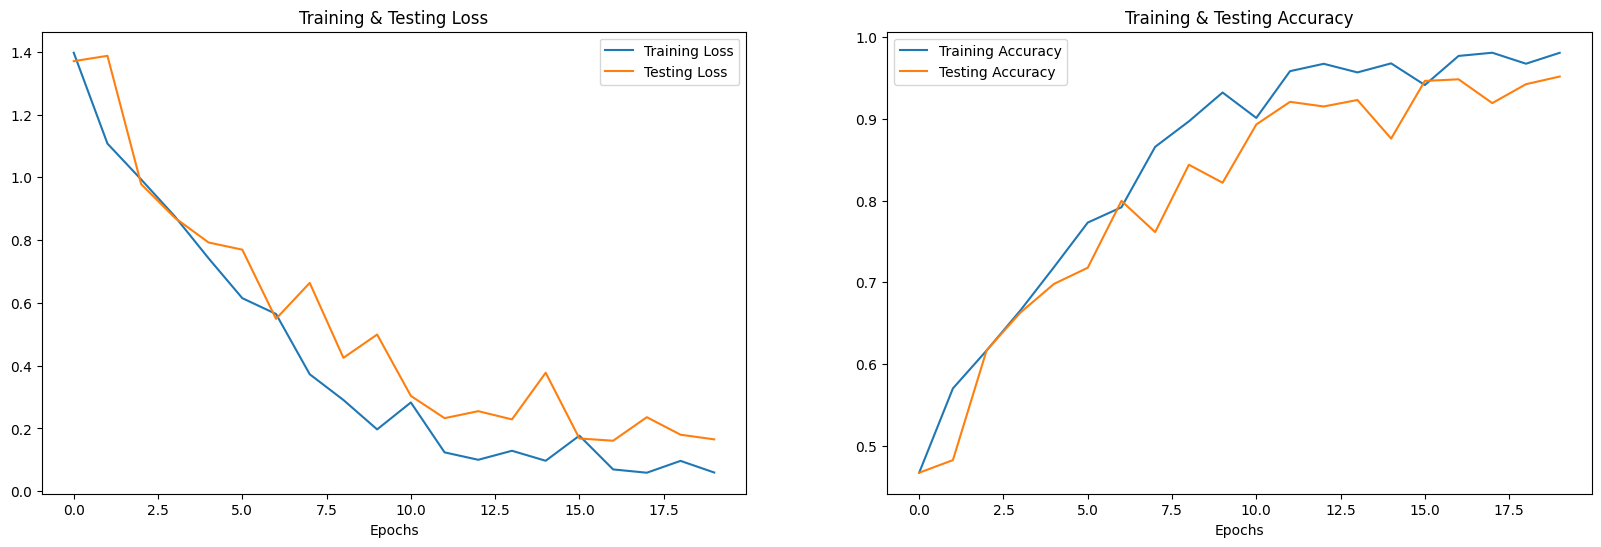

In [52]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [53]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

305/305 [==============================] - 14s 45ms/step


,Predicted Labels,Actual Labels
0,neutral,neutral
1,disgust,disgust
2,fear,fear
3,happy,happy
4,fear,fear
5,neutral,neutral
6,neutral,neutral
7,neutral,neutral
8,fear,fear
9,neutral,neutral


## **Evaluation**

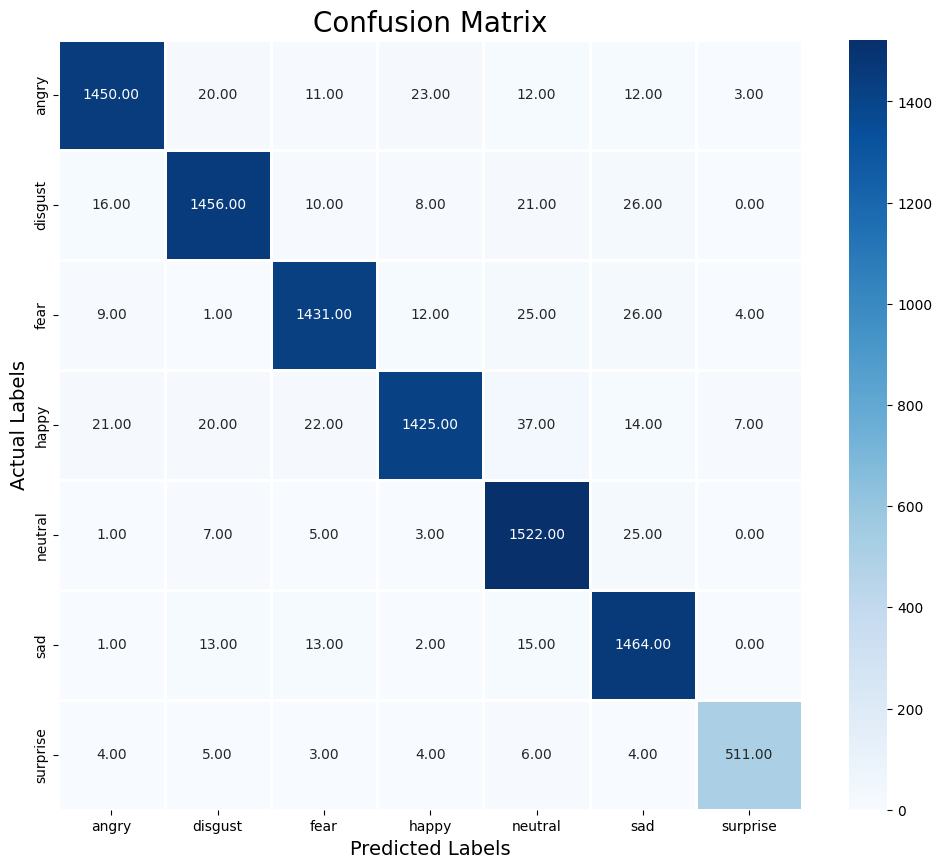

              precision    recall  f1-score   support

       angry       0.97      0.95      0.96      1531
     disgust       0.96      0.95      0.95      1537
        fear       0.96      0.95      0.95      1508
       happy       0.96      0.92      0.94      1546
     neutral       0.93      0.97      0.95      1563
         sad       0.93      0.97      0.95      1508
    surprise       0.97      0.95      0.96       537

    accuracy                           0.95      9730
   macro avg       0.95      0.95      0.95      9730
weighted avg       0.95      0.95      0.95      9730



In [54]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

## **Saving the model**

In [55]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from tensorflow.keras.models import Sequential, model_from_json
model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_model_weights.h5")
print("Saved model to disk")

Saved model to disk


In [56]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/content/CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/best_model1_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [57]:
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn,y_test)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

305/305 [==============================] - 15s 47ms/step - loss: 0.1652 - accuracy: 0.9516
accuracy: 95.16%


## **Testing the model**

In [58]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

Done


In [59]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('/content/CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/best_model1_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [60]:
import pickle

with open('/content/scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

with open('/content/encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)


print("Done")

Done


In [61]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten:bool=True):
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=20, hop_length=hop_length, n_fft=frame_length)
    return np.squeeze(mfccs.T) if not flatten else np.ravel(mfccs.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [62]:
def get_predict_feat(path):
    d, s_rate= librosa.load(path, duration=2.5, offset=0.6)
    res=extract_features(d)
    result=np.array(res)
    result=np.reshape(result,newshape=(1,2376))
    i_result = scaler2.transform(result)
    final_result=np.expand_dims(i_result, axis=2)

    return final_result

In [63]:
res=get_predict_feat("/content/Audio_data/Actor_04/03-01-01-01-01-01-04.wav")
print(res.shape)

(1, 2376, 1)


In [64]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred[0][0])

In [65]:
prediction("/content/Audio_data/Actor_02/03-01-01-01-01-02-02.wav")

1/1 [==============================] - 1s 725ms/step
neutral


In [66]:
prediction("/content/Audio_data/Actor_06/03-01-08-02-02-02-06.wav")

1/1 [==============================] - 0s 32ms/step
surprise


In [67]:
prediction("/content/Audio_data/Actor_11/03-01-02-02-01-02-11.wav")

1/1 [==============================] - 0s 35ms/step
neutral


In [68]:
prediction("/content/Audio_data/Actor_11/03-01-04-02-01-01-11.wav")

1/1 [==============================] - 0s 31ms/step
sad


In [69]:
prediction("/content/Audio_data/Actor_11/03-01-06-01-02-01-11.wav")

1/1 [==============================] - 0s 27ms/step
fear
